## Dataset (Load , exploration and  Cleaning)


In [1]:
# calculations and Dataframe
import pandas as pd
import numpy as np

# plot facial expression 
from matplotlib import pyplot as plt
from skimage import io

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Paquetes necesarios para la conversión de imágenes de color a escala de grises
from skimage.color import rgb2gray

from skimage.filters import gaussian

d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load dataset
dataset_facial_expression = pd.read_csv("../fer2013.csv")



#### Data exploration

In [3]:
# display the top five
dataset_facial_expression.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# display the last five
dataset_facial_expression.tail()


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


#### Detecting missing, nan or null

In [5]:
# Summary statistics: Numeric data
dataset_facial_expression.describe()


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
type(dataset_facial_expression)

pandas.core.frame.DataFrame

In [7]:
len(dataset_facial_expression)

35887

In [8]:
dataset_facial_expression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [9]:
dataset_facial_expression.isna()


,emotion,pixels,Usage
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


#### Data Exploration and plot pixels

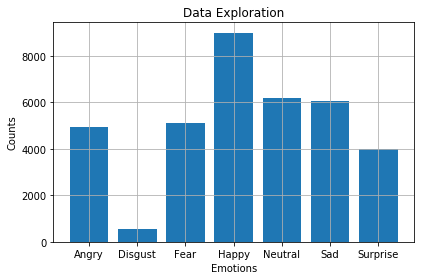

,emotion,count
3,Happy,8989
6,Neutral,6198
4,Sad,6077
2,Fear,5121
0,Angry,4953
5,Surprise,4002
1,Disgust,547


In [10]:
delais_emotion_label = ("Happy" , "Neutral", "Sad", "Fear" , "Angry", "Surprise" ,"Disgust")
delais_emotion = pd.DataFrame(data=dataset_facial_expression["emotion"].value_counts())

delais_emotion["count"] = delais_emotion["emotion"]
delais_emotion["emotion"] = delais_emotion_label
delais_emotion
%matplotlib inline
fig, ax = plt.subplots()

ax.bar(delais_emotion["emotion"], delais_emotion["count"] )
ax.set_title("Data Exploration")
ax.set_ylabel("Counts")
ax.set_xlabel("Emotions")
ax.grid()

fig.tight_layout()
plt.show()
delais_emotion


## 

In [11]:
y = np.zeros((35887, 48, 48))

for i in range(35887):
    imagen = dataset_facial_expression["pixels"][0+i]
    imagen_list_pixel = imagen.split(" ")
    imagen_array_pixel = np.asarray(imagen_list_pixel, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    elemento_estructural_disco = disk(1)
    image_gray = rgb2gray(imagen_rezise_pixel[0])
    chelsea_eroded = gaussian(image_gray, 1)
    imagen_array_pixel = np.asarray(chelsea_eroded, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    y[i] = y[i]+imagen_rezise_pixel[0]

      



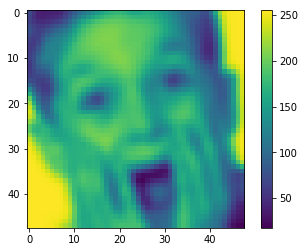

In [12]:
plt.figure()
plt.imshow(y[1800])
plt.colorbar()
plt.grid(False)

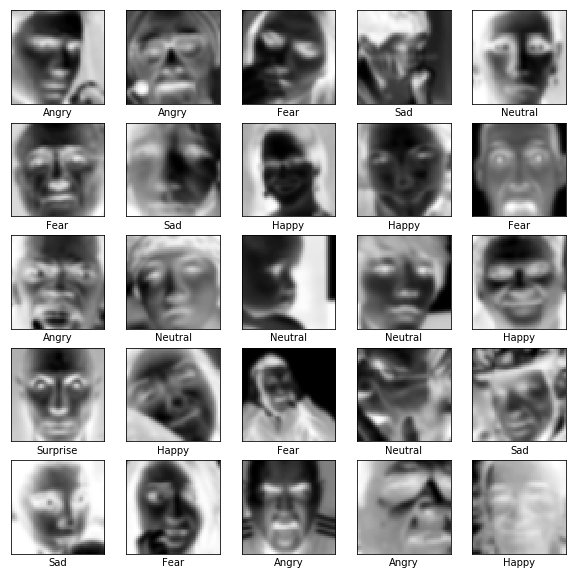

In [13]:

y= y / 255.0
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
label=  np.asarray(dataset_facial_expression["emotion"])
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(y[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label[i]])
    
    


In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [36]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [38]:
model.fit(y, label, epochs=3000)

Epoch 1/3000
35887/35887 [==============================] - 8s 231us/step - loss: 1.6486 - acc: 0.3577
Epoch 2/3000
35887/35887 [==============================] - 8s 221us/step - loss: 1.6388 - acc: 0.3610
Epoch 3/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.6323 - acc: 0.3622
Epoch 4/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.6234 - acc: 0.3632
Epoch 5/3000
35887/35887 [==============================] - 7s 206us/step - loss: 1.6154 - acc: 0.3693
Epoch 6/3000
35887/35887 [==============================] - 7s 207us/step - loss: 1.6127 - acc: 0.3727
Epoch 7/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.6089 - acc: 0.3724
Epoch 8/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.6060 - acc: 0.3752
Epoch 9/3000
35887/35887 [==============================] - 8s 220us/step - loss: 1.6031 - acc: 0.3741
Epoch 10/3000
35887/35887 [==============================] - 8s 230us/ste

35887/35887 [==============================] - 12s 334us/step - loss: 1.5188 - acc: 0.4086
Epoch 80/3000
35887/35887 [==============================] - 8s 219us/step - loss: 1.5187 - acc: 0.4107
Epoch 81/3000
35887/35887 [==============================] - 12s 335us/step - loss: 1.5205 - acc: 0.4086
Epoch 82/3000
35887/35887 [==============================] - 8s 224us/step - loss: 1.5193 - acc: 0.4096
Epoch 83/3000
35887/35887 [==============================] - 13s 360us/step - loss: 1.5168 - acc: 0.4102
Epoch 84/3000
35887/35887 [==============================] - 13s 359us/step - loss: 1.5182 - acc: 0.4114
Epoch 85/3000
35887/35887 [==============================] - 8s 223us/step - loss: 1.5176 - acc: 0.4109
Epoch 86/3000
35887/35887 [==============================] - 12s 344us/step - loss: 1.5157 - acc: 0.4117
Epoch 87/3000
35887/35887 [==============================] - 8s 220us/step - loss: 1.5167 - acc: 0.4117
Epoch 88/3000
35887/35887 [==============================] - 12s 334us/st

35887/35887 [==============================] - 8s 210us/step - loss: 1.4939 - acc: 0.4222
Epoch 157/3000
35887/35887 [==============================] - 12s 338us/step - loss: 1.4942 - acc: 0.4217
Epoch 158/3000
35887/35887 [==============================] - 8s 219us/step - loss: 1.4939 - acc: 0.4230
Epoch 159/3000
35887/35887 [==============================] - 12s 336us/step - loss: 1.4934 - acc: 0.4205
Epoch 160/3000
35887/35887 [==============================] - 10s 271us/step - loss: 1.4925 - acc: 0.4233
Epoch 161/3000
35887/35887 [==============================] - 9s 259us/step - loss: 1.4930 - acc: 0.4197
Epoch 162/3000
35887/35887 [==============================] - 12s 327us/step - loss: 1.4946 - acc: 0.4217
Epoch 163/3000
35887/35887 [==============================] - 8s 220us/step - loss: 1.4943 - acc: 0.4233
Epoch 164/3000
35887/35887 [==============================] - 12s 330us/step - loss: 1.4912 - acc: 0.4244
Epoch 165/3000
35887/35887 [==============================] - 8s 

35887/35887 [==============================] - 7s 205us/step - loss: 1.4796 - acc: 0.4267
Epoch 234/3000
35887/35887 [==============================] - 12s 328us/step - loss: 1.4799 - acc: 0.4304
Epoch 235/3000
35887/35887 [==============================] - 7s 208us/step - loss: 1.4796 - acc: 0.4283
Epoch 236/3000
35887/35887 [==============================] - 12s 325us/step - loss: 1.4781 - acc: 0.4288
Epoch 237/3000
35887/35887 [==============================] - 7s 208us/step - loss: 1.4769 - acc: 0.4285
Epoch 238/3000
35887/35887 [==============================] - 12s 320us/step - loss: 1.4829 - acc: 0.4276
Epoch 239/3000
35887/35887 [==============================] - 7s 206us/step - loss: 1.4794 - acc: 0.4268
Epoch 240/3000
35887/35887 [==============================] - 12s 324us/step - loss: 1.4807 - acc: 0.4279
Epoch 241/3000
35887/35887 [==============================] - 8s 209us/step - loss: 1.4770 - acc: 0.4278
Epoch 242/3000
35887/35887 [==============================] - 12s 

35887/35887 [==============================] - 9s 239us/step - loss: 1.4678 - acc: 0.4336
Epoch 311/3000
35887/35887 [==============================] - 12s 325us/step - loss: 1.4709 - acc: 0.4323
Epoch 312/3000
35887/35887 [==============================] - 7s 209us/step - loss: 1.4692 - acc: 0.4340
Epoch 313/3000
35887/35887 [==============================] - 12s 326us/step - loss: 1.4698 - acc: 0.4332
Epoch 314/3000
35887/35887 [==============================] - 7s 208us/step - loss: 1.4693 - acc: 0.4335
Epoch 315/3000
35887/35887 [==============================] - 12s 331us/step - loss: 1.4683 - acc: 0.4330
Epoch 316/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4667 - acc: 0.4334
Epoch 317/3000
35887/35887 [==============================] - 11s 320us/step - loss: 1.4715 - acc: 0.4317
Epoch 318/3000
35887/35887 [==============================] - 7s 209us/step - loss: 1.4690 - acc: 0.4342
Epoch 319/3000
35887/35887 [==============================] - 11s 

35887/35887 [==============================] - 11s 293us/step - loss: 1.4645 - acc: 0.4346
Epoch 388/3000
35887/35887 [==============================] - 8s 234us/step - loss: 1.4584 - acc: 0.4358
Epoch 389/3000
35887/35887 [==============================] - 11s 310us/step - loss: 1.4623 - acc: 0.4342
Epoch 390/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4634 - acc: 0.4358
Epoch 391/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.4652 - acc: 0.4330
Epoch 392/3000
35887/35887 [==============================] - 7s 207us/step - loss: 1.4624 - acc: 0.4331
Epoch 393/3000
35887/35887 [==============================] - 11s 320us/step - loss: 1.4582 - acc: 0.4361
Epoch 394/3000
35887/35887 [==============================] - 8s 211us/step - loss: 1.4600 - acc: 0.4383
Epoch 395/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.4596 - acc: 0.4365
Epoch 396/3000
35887/35887 [==============================] - 8s 

35887/35887 [==============================] - 12s 334us/step - loss: 1.4544 - acc: 0.4387
Epoch 465/3000
35887/35887 [==============================] - 8s 224us/step - loss: 1.4531 - acc: 0.4377
Epoch 466/3000
35887/35887 [==============================] - 12s 345us/step - loss: 1.4548 - acc: 0.4391
Epoch 467/3000
35887/35887 [==============================] - 12s 322us/step - loss: 1.4543 - acc: 0.4381
Epoch 468/3000
35887/35887 [==============================] - 9s 240us/step - loss: 1.4543 - acc: 0.4402
Epoch 469/3000
35887/35887 [==============================] - 12s 333us/step - loss: 1.4558 - acc: 0.4395
Epoch 470/3000
35887/35887 [==============================] - 8s 223us/step - loss: 1.4537 - acc: 0.4389
Epoch 471/3000
35887/35887 [==============================] - 13s 351us/step - loss: 1.4532 - acc: 0.4379
Epoch 472/3000
35887/35887 [==============================] - 13s 357us/step - loss: 1.4544 - acc: 0.4380
Epoch 473/3000
35887/35887 [==============================] - 8s

35887/35887 [==============================] - 12s 325us/step - loss: 1.4497 - acc: 0.4387
Epoch 542/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4506 - acc: 0.4404
Epoch 543/3000
35887/35887 [==============================] - 12s 327us/step - loss: 1.4498 - acc: 0.4397
Epoch 544/3000
35887/35887 [==============================] - 8s 235us/step - loss: 1.4467 - acc: 0.4412
Epoch 545/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.4470 - acc: 0.4404
Epoch 546/3000
35887/35887 [==============================] - 12s 326us/step - loss: 1.4496 - acc: 0.4401
Epoch 547/3000
35887/35887 [==============================] - 8s 222us/step - loss: 1.4486 - acc: 0.4407
Epoch 548/3000
35887/35887 [==============================] - 12s 331us/step - loss: 1.4473 - acc: 0.4399
Epoch 549/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4474 - acc: 0.4392
Epoch 550/3000
35887/35887 [==============================] - 12s

35887/35887 [==============================] - 8s 214us/step - loss: 1.4423 - acc: 0.4425
Epoch 619/3000
35887/35887 [==============================] - 12s 328us/step - loss: 1.4443 - acc: 0.4421
Epoch 620/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4431 - acc: 0.4409
Epoch 621/3000
35887/35887 [==============================] - 12s 331us/step - loss: 1.4439 - acc: 0.4424
Epoch 622/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4408 - acc: 0.4429
Epoch 623/3000
35887/35887 [==============================] - 12s 325us/step - loss: 1.4434 - acc: 0.4422
Epoch 624/3000
35887/35887 [==============================] - 10s 292us/step - loss: 1.4440 - acc: 0.4420
Epoch 625/3000
35887/35887 [==============================] - 9s 247us/step - loss: 1.4420 - acc: 0.4433
Epoch 626/3000
35887/35887 [==============================] - 12s 328us/step - loss: 1.4433 - acc: 0.4428
Epoch 627/3000
35887/35887 [==============================] - 8s 

35887/35887 [==============================] - 12s 331us/step - loss: 1.4373 - acc: 0.4450
Epoch 696/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4392 - acc: 0.4431
Epoch 697/3000
35887/35887 [==============================] - 12s 327us/step - loss: 1.4395 - acc: 0.4429
Epoch 698/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4380 - acc: 0.4442
Epoch 699/3000
35887/35887 [==============================] - 12s 323us/step - loss: 1.4386 - acc: 0.4428
Epoch 700/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4403 - acc: 0.4433
Epoch 701/3000
35887/35887 [==============================] - 12s 326us/step - loss: 1.4400 - acc: 0.4449
Epoch 702/3000
35887/35887 [==============================] - 9s 254us/step - loss: 1.4367 - acc: 0.4444
Epoch 703/3000
35887/35887 [==============================] - 10s 291us/step - loss: 1.4376 - acc: 0.4424
Epoch 704/3000
35887/35887 [==============================] - 9s 

35887/35887 [==============================] - 12s 324us/step - loss: 1.4320 - acc: 0.4480
Epoch 773/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.4348 - acc: 0.4440
Epoch 774/3000
35887/35887 [==============================] - 12s 323us/step - loss: 1.4324 - acc: 0.4455
Epoch 775/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4327 - acc: 0.4453
Epoch 776/3000
35887/35887 [==============================] - 12s 329us/step - loss: 1.4375 - acc: 0.4461
Epoch 777/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4319 - acc: 0.4448
Epoch 778/3000
35887/35887 [==============================] - 11s 315us/step - loss: 1.4316 - acc: 0.4483
Epoch 779/3000
35887/35887 [==============================] - 8s 225us/step - loss: 1.4312 - acc: 0.4471
Epoch 780/3000
35887/35887 [==============================] - 12s 326us/step - loss: 1.4295 - acc: 0.4457
Epoch 781/3000
35887/35887 [==============================] - 9s 

35887/35887 [==============================] - 8s 215us/step - loss: 1.4293 - acc: 0.4469
Epoch 850/3000
35887/35887 [==============================] - 12s 328us/step - loss: 1.4282 - acc: 0.4478
Epoch 851/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4276 - acc: 0.4471
Epoch 852/3000
35887/35887 [==============================] - 11s 320us/step - loss: 1.4301 - acc: 0.4472
Epoch 853/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4313 - acc: 0.4459
Epoch 854/3000
35887/35887 [==============================] - 12s 329us/step - loss: 1.4301 - acc: 0.4468
Epoch 855/3000
35887/35887 [==============================] - 8s 224us/step - loss: 1.4292 - acc: 0.4469
Epoch 856/3000
35887/35887 [==============================] - 12s 328us/step - loss: 1.4318 - acc: 0.4449
Epoch 857/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4306 - acc: 0.4446
Epoch 858/3000
35887/35887 [==============================] - 12s 

35887/35887 [==============================] - 8s 215us/step - loss: 1.4269 - acc: 0.4462
Epoch 927/3000
35887/35887 [==============================] - 12s 322us/step - loss: 1.4261 - acc: 0.4485
Epoch 928/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4242 - acc: 0.4491
Epoch 929/3000
35887/35887 [==============================] - 12s 327us/step - loss: 1.4270 - acc: 0.4466
Epoch 930/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4268 - acc: 0.4485
Epoch 931/3000
35887/35887 [==============================] - 12s 330us/step - loss: 1.4283 - acc: 0.4482
Epoch 932/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4244 - acc: 0.4476
Epoch 933/3000
35887/35887 [==============================] - 12s 323us/step - loss: 1.4260 - acc: 0.4481
Epoch 934/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4242 - acc: 0.4505
Epoch 935/3000
35887/35887 [==============================] - 12s 

35887/35887 [==============================] - 10s 278us/step - loss: 1.4237 - acc: 0.4487
Epoch 1004/3000
35887/35887 [==============================] - 9s 255us/step - loss: 1.4213 - acc: 0.4498
Epoch 1005/3000
35887/35887 [==============================] - 9s 258us/step - loss: 1.4238 - acc: 0.4505
Epoch 1006/3000
35887/35887 [==============================] - 10s 281us/step - loss: 1.4226 - acc: 0.4493
Epoch 1007/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4257 - acc: 0.4497
Epoch 1008/3000
35887/35887 [==============================] - 11s 318us/step - loss: 1.4242 - acc: 0.4481
Epoch 1009/3000
35887/35887 [==============================] - 8s 217us/step - loss: 1.4247 - acc: 0.4497
Epoch 1010/3000
35887/35887 [==============================] - 12s 326us/step - loss: 1.4250 - acc: 0.4478
Epoch 1011/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4217 - acc: 0.4495
Epoch 1012/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 213us/step - loss: 1.4188 - acc: 0.4507
Epoch 1081/3000
35887/35887 [==============================] - 12s 333us/step - loss: 1.4182 - acc: 0.4504
Epoch 1082/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4206 - acc: 0.4471
Epoch 1083/3000
35887/35887 [==============================] - 11s 315us/step - loss: 1.4226 - acc: 0.4488
Epoch 1084/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4230 - acc: 0.4499
Epoch 1085/3000
35887/35887 [==============================] - 12s 322us/step - loss: 1.4232 - acc: 0.4509
Epoch 1086/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4186 - acc: 0.4524
Epoch 1087/3000
35887/35887 [==============================] - 12s 323us/step - loss: 1.4210 - acc: 0.4482
Epoch 1088/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4234 - acc: 0.4486
Epoch 1089/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 215us/step - loss: 1.4154 - acc: 0.4507
Epoch 1158/3000
35887/35887 [==============================] - 12s 325us/step - loss: 1.4196 - acc: 0.4518
Epoch 1159/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4184 - acc: 0.4513
Epoch 1160/3000
35887/35887 [==============================] - 11s 320us/step - loss: 1.4153 - acc: 0.4518
Epoch 1161/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.4184 - acc: 0.4520
Epoch 1162/3000
35887/35887 [==============================] - 11s 318us/step - loss: 1.4173 - acc: 0.4537
Epoch 1163/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.4167 - acc: 0.4524
Epoch 1164/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.4144 - acc: 0.4526
Epoch 1165/3000
35887/35887 [==============================] - 8s 230us/step - loss: 1.4157 - acc: 0.4534
Epoch 1166/3000
35887/35887 [=============================

35887/35887 [==============================] - 11s 319us/step - loss: 1.4142 - acc: 0.4544
Epoch 1235/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4145 - acc: 0.4539
Epoch 1236/3000
35887/35887 [==============================] - 12s 329us/step - loss: 1.4150 - acc: 0.4533
Epoch 1237/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4145 - acc: 0.4513
Epoch 1238/3000
35887/35887 [==============================] - 11s 314us/step - loss: 1.4145 - acc: 0.4527
Epoch 1239/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4118 - acc: 0.4541
Epoch 1240/3000
35887/35887 [==============================] - 11s 295us/step - loss: 1.4153 - acc: 0.4540
Epoch 1241/3000
35887/35887 [==============================] - 9s 239us/step - loss: 1.4157 - acc: 0.4486
Epoch 1242/3000
35887/35887 [==============================] - 10s 292us/step - loss: 1.4145 - acc: 0.4526
Epoch 1243/3000
35887/35887 [============================

35887/35887 [==============================] - 8s 212us/step - loss: 1.4114 - acc: 0.4514
Epoch 1312/3000
35887/35887 [==============================] - 12s 329us/step - loss: 1.4111 - acc: 0.4551
Epoch 1313/3000
35887/35887 [==============================] - 8s 220us/step - loss: 1.4141 - acc: 0.4532
Epoch 1314/3000
35887/35887 [==============================] - 10s 287us/step - loss: 1.4098 - acc: 0.4557
Epoch 1315/3000
35887/35887 [==============================] - 9s 247us/step - loss: 1.4129 - acc: 0.4542
Epoch 1316/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4149 - acc: 0.4520
Epoch 1317/3000
35887/35887 [==============================] - 12s 325us/step - loss: 1.4140 - acc: 0.4532
Epoch 1318/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4108 - acc: 0.4549
Epoch 1319/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.4115 - acc: 0.4546
Epoch 1320/3000
35887/35887 [=============================

35887/35887 [==============================] - 12s 321us/step - loss: 1.4132 - acc: 0.4528
Epoch 1389/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4065 - acc: 0.4563
Epoch 1390/3000
35887/35887 [==============================] - 9s 248us/step - loss: 1.4127 - acc: 0.4549
Epoch 1391/3000
35887/35887 [==============================] - 10s 279us/step - loss: 1.4092 - acc: 0.4564
Epoch 1392/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4117 - acc: 0.4549
Epoch 1393/3000
35887/35887 [==============================] - 11s 318us/step - loss: 1.4149 - acc: 0.4529
Epoch 1394/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4116 - acc: 0.4531
Epoch 1395/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.4091 - acc: 0.4553
Epoch 1396/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4078 - acc: 0.4574
Epoch 1397/3000
35887/35887 [=============================

35887/35887 [==============================] - 10s 269us/step - loss: 1.4120 - acc: 0.4534
Epoch 1466/3000
35887/35887 [==============================] - 9s 263us/step - loss: 1.4100 - acc: 0.4542
Epoch 1467/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.4075 - acc: 0.4545
Epoch 1468/3000
35887/35887 [==============================] - 11s 315us/step - loss: 1.4082 - acc: 0.4559
Epoch 1469/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4086 - acc: 0.4557
Epoch 1470/3000
35887/35887 [==============================] - 12s 332us/step - loss: 1.4091 - acc: 0.4541
Epoch 1471/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4069 - acc: 0.4569
Epoch 1472/3000
35887/35887 [==============================] - 12s 323us/step - loss: 1.4082 - acc: 0.4570
Epoch 1473/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4097 - acc: 0.4554
Epoch 1474/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 215us/step - loss: 1.4048 - acc: 0.4567
Epoch 1543/3000
35887/35887 [==============================] - 11s 307us/step - loss: 1.4062 - acc: 0.4568
Epoch 1544/3000
35887/35887 [==============================] - 8s 225us/step - loss: 1.4069 - acc: 0.4546
Epoch 1545/3000
35887/35887 [==============================] - 8s 229us/step - loss: 1.4042 - acc: 0.4551
Epoch 1546/3000
35887/35887 [==============================] - 11s 302us/step - loss: 1.4069 - acc: 0.4571
Epoch 1547/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.4070 - acc: 0.4545
Epoch 1548/3000
35887/35887 [==============================] - 12s 321us/step - loss: 1.4083 - acc: 0.4543
Epoch 1549/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.4063 - acc: 0.4555
Epoch 1550/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.4130 - acc: 0.4560
Epoch 1551/3000
35887/35887 [=============================

35887/35887 [==============================] - 11s 298us/step - loss: 1.4082 - acc: 0.4577
Epoch 1620/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4066 - acc: 0.4573
Epoch 1621/3000
35887/35887 [==============================] - 11s 320us/step - loss: 1.4080 - acc: 0.4553
Epoch 1622/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.4027 - acc: 0.4572
Epoch 1623/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.4010 - acc: 0.4595
Epoch 1624/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.4070 - acc: 0.4568
Epoch 1625/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.4043 - acc: 0.4550
Epoch 1626/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.4049 - acc: 0.4553
Epoch 1627/3000
35887/35887 [==============================] - 11s 320us/step - loss: 1.4075 - acc: 0.4562
Epoch 1628/3000
35887/35887 [============================

35887/35887 [==============================] - 11s 316us/step - loss: 1.4039 - acc: 0.4580
Epoch 1697/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.4030 - acc: 0.4583
Epoch 1698/3000
35887/35887 [==============================] - 12s 321us/step - loss: 1.4011 - acc: 0.4577
Epoch 1699/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.4020 - acc: 0.4586
Epoch 1700/3000
35887/35887 [==============================] - 8s 224us/step - loss: 1.4011 - acc: 0.4586
Epoch 1701/3000
35887/35887 [==============================] - 11s 300us/step - loss: 1.4027 - acc: 0.4572
Epoch 1702/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4019 - acc: 0.4546
Epoch 1703/3000
35887/35887 [==============================] - 11s 314us/step - loss: 1.4084 - acc: 0.4554
Epoch 1704/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.4030 - acc: 0.4564
Epoch 1705/3000
35887/35887 [=============================

35887/35887 [==============================] - 10s 286us/step - loss: 1.3997 - acc: 0.4604
Epoch 1774/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3999 - acc: 0.4568
Epoch 1775/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.4048 - acc: 0.4581
Epoch 1776/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4039 - acc: 0.4554
Epoch 1777/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.4005 - acc: 0.4577
Epoch 1778/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3963 - acc: 0.4603
Epoch 1779/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.4015 - acc: 0.4595
Epoch 1780/3000
35887/35887 [==============================] - 12s 330us/step - loss: 1.4024 - acc: 0.4563
Epoch 1781/3000
35887/35887 [==============================] - 8s 218us/step - loss: 1.4031 - acc: 0.4582
Epoch 1782/3000
35887/35887 [=============================

35887/35887 [==============================] - 11s 317us/step - loss: 1.4001 - acc: 0.4570
Epoch 1851/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3982 - acc: 0.4604
Epoch 1852/3000
35887/35887 [==============================] - 11s 311us/step - loss: 1.4004 - acc: 0.4585
Epoch 1853/3000
35887/35887 [==============================] - 8s 218us/step - loss: 1.3994 - acc: 0.4586
Epoch 1854/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4024 - acc: 0.4569
Epoch 1855/3000
35887/35887 [==============================] - 11s 310us/step - loss: 1.3995 - acc: 0.4582
Epoch 1856/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3982 - acc: 0.4584
Epoch 1857/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.3982 - acc: 0.4589
Epoch 1858/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.4023 - acc: 0.4559
Epoch 1859/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 213us/step - loss: 1.3957 - acc: 0.4605
Epoch 1928/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3977 - acc: 0.4585
Epoch 1929/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3972 - acc: 0.4603
Epoch 1930/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.3989 - acc: 0.4587
Epoch 1931/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3968 - acc: 0.4609
Epoch 1932/3000
35887/35887 [==============================] - 11s 312us/step - loss: 1.3975 - acc: 0.4586
Epoch 1933/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3980 - acc: 0.4585
Epoch 1934/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.3981 - acc: 0.4590
Epoch 1935/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.3962 - acc: 0.4600
Epoch 1936/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 213us/step - loss: 1.3954 - acc: 0.4593
Epoch 2005/3000
35887/35887 [==============================] - 11s 309us/step - loss: 1.4027 - acc: 0.4584
Epoch 2006/3000
35887/35887 [==============================] - 8s 222us/step - loss: 1.4026 - acc: 0.4560
Epoch 2007/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3982 - acc: 0.4607
Epoch 2008/3000
35887/35887 [==============================] - 11s 315us/step - loss: 1.3945 - acc: 0.4604
Epoch 2009/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3986 - acc: 0.4579
Epoch 2010/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.3969 - acc: 0.4588
Epoch 2011/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.3929 - acc: 0.4619
Epoch 2012/3000
35887/35887 [==============================] - 8s 232us/step - loss: 1.3960 - acc: 0.4616
Epoch 2013/3000
35887/35887 [==============================

35887/35887 [==============================] - 11s 318us/step - loss: 1.3930 - acc: 0.4627
Epoch 2082/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3967 - acc: 0.4599
Epoch 2083/3000
35887/35887 [==============================] - 12s 325us/step - loss: 1.3936 - acc: 0.4616
Epoch 2084/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3917 - acc: 0.4608
Epoch 2085/3000
35887/35887 [==============================] - 8s 227us/step - loss: 1.3915 - acc: 0.4604
Epoch 2086/3000
35887/35887 [==============================] - 11s 305us/step - loss: 1.3939 - acc: 0.4609
Epoch 2087/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3999 - acc: 0.4591
Epoch 2088/3000
35887/35887 [==============================] - 11s 318us/step - loss: 1.3965 - acc: 0.4587
Epoch 2089/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3936 - acc: 0.4615
Epoch 2090/3000
35887/35887 [=============================

35887/35887 [==============================] - 11s 316us/step - loss: 1.3958 - acc: 0.4622
Epoch 2159/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3923 - acc: 0.4608
Epoch 2160/3000
35887/35887 [==============================] - 10s 278us/step - loss: 1.3904 - acc: 0.4623
Epoch 2161/3000
35887/35887 [==============================] - 9s 256us/step - loss: 1.3933 - acc: 0.4614
Epoch 2162/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3924 - acc: 0.4614
Epoch 2163/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.3955 - acc: 0.4594
Epoch 2164/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3948 - acc: 0.4603
Epoch 2165/3000
35887/35887 [==============================] - 11s 319us/step - loss: 1.3939 - acc: 0.4609
Epoch 2166/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.3936 - acc: 0.4603
Epoch 2167/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 215us/step - loss: 1.3918 - acc: 0.4628
Epoch 2236/3000
35887/35887 [==============================] - 11s 306us/step - loss: 1.3955 - acc: 0.4615
Epoch 2237/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3896 - acc: 0.4620
Epoch 2238/3000
35887/35887 [==============================] - 11s 303us/step - loss: 1.3913 - acc: 0.4624
Epoch 2239/3000
35887/35887 [==============================] - 8s 217us/step - loss: 1.3895 - acc: 0.4625
Epoch 2240/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.3957 - acc: 0.4599
Epoch 2241/3000
35887/35887 [==============================] - 11s 315us/step - loss: 1.3893 - acc: 0.4642
Epoch 2242/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3908 - acc: 0.4636
Epoch 2243/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3934 - acc: 0.4625
Epoch 2244/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 234us/step - loss: 1.3892 - acc: 0.4616
Epoch 2313/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3918 - acc: 0.4601
Epoch 2314/3000
35887/35887 [==============================] - 11s 316us/step - loss: 1.3905 - acc: 0.4617
Epoch 2315/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3896 - acc: 0.4631
Epoch 2316/3000
35887/35887 [==============================] - 10s 291us/step - loss: 1.3900 - acc: 0.4618
Epoch 2317/3000
35887/35887 [==============================] - 8s 234us/step - loss: 1.3903 - acc: 0.4614
Epoch 2318/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3887 - acc: 0.4632
Epoch 2319/3000
35887/35887 [==============================] - 11s 309us/step - loss: 1.3915 - acc: 0.4623
Epoch 2320/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3889 - acc: 0.4624
Epoch 2321/3000
35887/35887 [==============================

35887/35887 [==============================] - 8s 213us/step - loss: 1.3945 - acc: 0.4603
Epoch 2390/3000
35887/35887 [==============================] - 11s 309us/step - loss: 1.3938 - acc: 0.4608
Epoch 2391/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3916 - acc: 0.4617
Epoch 2392/3000
35887/35887 [==============================] - 11s 314us/step - loss: 1.3902 - acc: 0.4619
Epoch 2393/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3900 - acc: 0.4632
Epoch 2394/3000
35887/35887 [==============================] - 8s 218us/step - loss: 1.3876 - acc: 0.4636
Epoch 2395/3000
35887/35887 [==============================] - 11s 306us/step - loss: 1.3868 - acc: 0.4601
Epoch 2396/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3872 - acc: 0.4648
Epoch 2397/3000
35887/35887 [==============================] - 11s 315us/step - loss: 1.3923 - acc: 0.4622
Epoch 2398/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 212us/step - loss: 1.3898 - acc: 0.4636
Epoch 2467/3000
35887/35887 [==============================] - 12s 320us/step - loss: 1.3886 - acc: 0.4640
Epoch 2468/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3882 - acc: 0.4642
Epoch 2469/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3894 - acc: 0.4640
Epoch 2470/3000
35887/35887 [==============================] - 11s 310us/step - loss: 1.3900 - acc: 0.4605
Epoch 2471/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3868 - acc: 0.4617
Epoch 2472/3000
35887/35887 [==============================] - 10s 270us/step - loss: 1.3868 - acc: 0.4633
Epoch 2473/3000
35887/35887 [==============================] - 9s 264us/step - loss: 1.3886 - acc: 0.4619
Epoch 2474/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3855 - acc: 0.4627
Epoch 2475/3000
35887/35887 [==============================

35887/35887 [==============================] - 8s 218us/step - loss: 1.3835 - acc: 0.4640
Epoch 2544/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3898 - acc: 0.4627
Epoch 2545/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3869 - acc: 0.4632
Epoch 2546/3000
35887/35887 [==============================] - 8s 229us/step - loss: 1.3943 - acc: 0.4616
Epoch 2547/3000
35887/35887 [==============================] - 11s 296us/step - loss: 1.3860 - acc: 0.4653
Epoch 2548/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3862 - acc: 0.4640
Epoch 2549/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3847 - acc: 0.4656
Epoch 2550/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3841 - acc: 0.4663
Epoch 2551/3000
35887/35887 [==============================] - 10s 285us/step - loss: 1.3894 - acc: 0.4628
Epoch 2552/3000
35887/35887 [=============================

35887/35887 [==============================] - 8s 213us/step - loss: 1.3860 - acc: 0.4638
Epoch 2621/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3812 - acc: 0.4667
Epoch 2622/3000
35887/35887 [==============================] - 11s 314us/step - loss: 1.3848 - acc: 0.4648
Epoch 2623/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3860 - acc: 0.4640
Epoch 2624/3000
35887/35887 [==============================] - 9s 252us/step - loss: 1.3884 - acc: 0.4618
Epoch 2625/3000
35887/35887 [==============================] - 9s 264us/step - loss: 1.3826 - acc: 0.4651
Epoch 2626/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3855 - acc: 0.4642
Epoch 2627/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3834 - acc: 0.4641
Epoch 2628/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3841 - acc: 0.4649
Epoch 2629/3000
35887/35887 [==============================]

35887/35887 [==============================] - 8s 212us/step - loss: 1.3893 - acc: 0.4631
Epoch 2698/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3838 - acc: 0.4634
Epoch 2699/3000
35887/35887 [==============================] - 11s 312us/step - loss: 1.3837 - acc: 0.4651
Epoch 2700/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3834 - acc: 0.4648
Epoch 2701/3000
35887/35887 [==============================] - 8s 230us/step - loss: 1.3881 - acc: 0.4637
Epoch 2702/3000
35887/35887 [==============================] - 11s 293us/step - loss: 1.3827 - acc: 0.4659
Epoch 2703/3000
35887/35887 [==============================] - 8s 216us/step - loss: 1.3855 - acc: 0.4654
Epoch 2704/3000
35887/35887 [==============================] - 11s 312us/step - loss: 1.3823 - acc: 0.4641
Epoch 2705/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3846 - acc: 0.4659
Epoch 2706/3000
35887/35887 [==============================

Epoch 2774/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3847 - acc: 0.4657
Epoch 2775/3000
35887/35887 [==============================] - 11s 309us/step - loss: 1.3851 - acc: 0.4653
Epoch 2776/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3812 - acc: 0.4652
Epoch 2777/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.3826 - acc: 0.4642
Epoch 2778/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3890 - acc: 0.4644
Epoch 2779/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3808 - acc: 0.4669
Epoch 2780/3000
35887/35887 [==============================] - 11s 306us/step - loss: 1.3836 - acc: 0.4646
Epoch 2781/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3859 - acc: 0.4649
Epoch 2782/3000
35887/35887 [==============================] - 11s 318us/step - loss: 1.3815 - acc: 0.4648
Epoch 2783/3000
35887/35887 [=============

Epoch 2851/3000
35887/35887 [==============================] - 10s 269us/step - loss: 1.3800 - acc: 0.4672
Epoch 2852/3000
35887/35887 [==============================] - 8s 212us/step - loss: 1.3828 - acc: 0.4655
Epoch 2853/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3831 - acc: 0.4653
Epoch 2854/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3834 - acc: 0.4662
Epoch 2855/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3808 - acc: 0.4659
Epoch 2856/3000
35887/35887 [==============================] - 11s 317us/step - loss: 1.3819 - acc: 0.4659
Epoch 2857/3000
35887/35887 [==============================] - 8s 215us/step - loss: 1.3849 - acc: 0.4627
Epoch 2858/3000
35887/35887 [==============================] - 11s 311us/step - loss: 1.3892 - acc: 0.4620
Epoch 2859/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3855 - acc: 0.4666
Epoch 2860/3000
35887/35887 [=============

Epoch 2928/3000
35887/35887 [==============================] - 11s 308us/step - loss: 1.3813 - acc: 0.4659
Epoch 2929/3000
35887/35887 [==============================] - 8s 222us/step - loss: 1.3828 - acc: 0.4663
Epoch 2930/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3849 - acc: 0.4658
Epoch 2931/3000
35887/35887 [==============================] - 11s 311us/step - loss: 1.3841 - acc: 0.4645
Epoch 2932/3000
35887/35887 [==============================] - 8s 214us/step - loss: 1.3802 - acc: 0.4658
Epoch 2933/3000
35887/35887 [==============================] - 8s 232us/step - loss: 1.3809 - acc: 0.4672
Epoch 2934/3000
35887/35887 [==============================] - 11s 293us/step - loss: 1.3832 - acc: 0.4644
Epoch 2935/3000
35887/35887 [==============================] - 8s 213us/step - loss: 1.3818 - acc: 0.4662
Epoch 2936/3000
35887/35887 [==============================] - 11s 310us/step - loss: 1.3781 - acc: 0.4672
Epoch 2937/3000
35887/35887 [=============

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8780068026064800543
]
